<a href="https://colab.research.google.com/github/Nimma-shravan-kumar-reddy/ShellHacks/blob/master/MITRE_ShellHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Libraries

In [1]:
import numpy as np # mathematical functions and arrays
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for visualizing data 
import seaborn as sns # Exploratory data analysis
import nltk   # Natural language toolkit
import re      # regular expressions
from wordcloud import WordCloud # Text visualization package

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing the text data
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding the data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPool1D, Conv1D, LSTM
from sklearn.model_selection import train_test_split # For splitting the data into test and train sets
from sklearn.metrics import classification_report, accuracy_score # For checking performance of our model




### Reading Data

In [4]:
mis_data = pd.read_csv("https://raw.githubusercontent.com/Nimma-shravan-kumar-reddy/ShellHacks/master/shravan/Fake.csv")
mis_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [24]:
mis_data['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

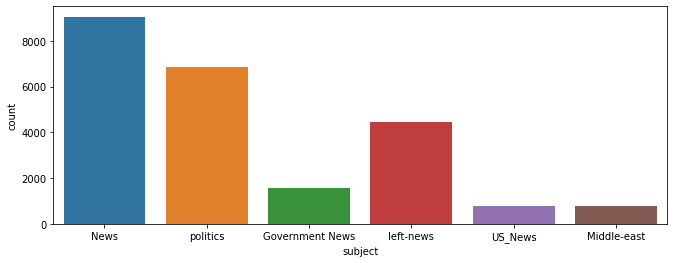

In [16]:
plt.figure(figsize=(11,4))
sns.countplot(x='subject',data=mis_data)

In [28]:
# joining the whole text data
text = ' '.join(mis_data['text'].tolist())

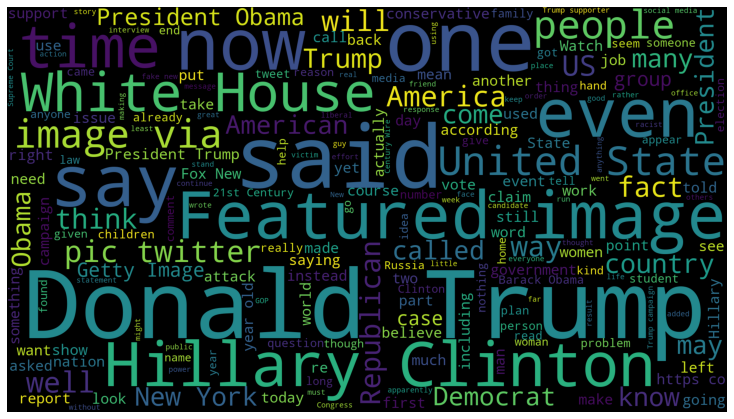

In [32]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig = plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
real_data = pd.read_csv('https://raw.githubusercontent.com/Nimma-shravan-kumar-reddy/ShellHacks/master/shravan/True.csv')
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [36]:
text = ' '.join(real_data['text'].tolist())

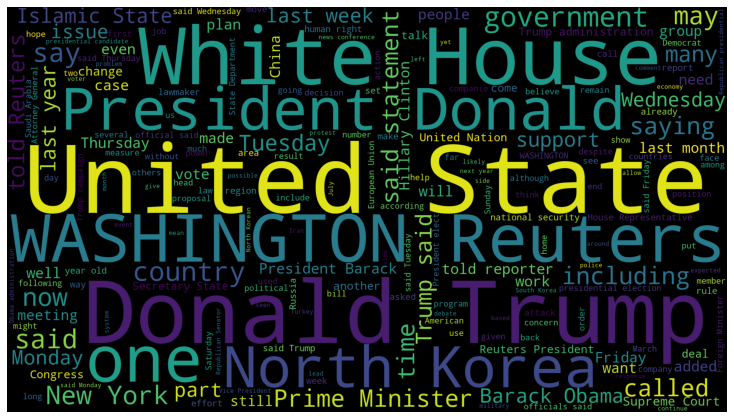

In [37]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig = plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## **Real Information seems to have source or publication which is not present in misinformation set text**


1.   most of the text reuters information such as **"WASHINGTON(Reuters)"**.
2.   some text are tweets 
3.   few text does not contain any publication info



# Cleaning Data
removing Reuters or Twitter Tweet information from the text


*   Text can be splitted only once at '-' which is always present after mentioning source of publication.
*   If we do not get text part, this means publication details were not given for that record.
*   The twitter tweets always have same source, a long text of 259 characters







In [38]:
real_data.sample(5)

,title,text,subject,date
9305,Native Americans move to frontlines in battle ...,"BELCOURT, North Dakota (Reuters) - Elvis Norqu...",politicsNews,"May 31, 2016"
11232,Advocates perplexed by U.S. response to Centra...,WASHINGTON (Reuters) - Refugee advocates said ...,politicsNews,"January 14, 2016"
20449,China says diplomacy needed to rid Korean peni...,BEIJING (Reuters) - Denuclearization of the Ko...,worldnews,"September 11, 2017"
1042,U.S. lawmakers will not tackle healthcare this...,WASHINGTON (Reuters) - Republican lawmakers wi...,politicsNews,"October 25, 2017"
19382,Rockets hit Damascus airport area in probable ...,BEIRUT (Reuters) - Two rockets struck near Dam...,worldnews,"September 22, 2017"


In [43]:
Unknown_publishers=[]
for index, row in enumerate(real_data.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    Unknown_publishers.append(index)


In [42]:
len(Unknown_publishers)

31

In [44]:
real_data = real_data.drop(8970,axis=0)

In [50]:
publisher = []
tmp_text = []

for index, row in enumerate(real_data.text.values):
  if index in Unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [51]:
real_data['publisher']=publisher
real_data['text']= tmp_text
real_data.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [53]:
empty_fake_index=[index for index, text in enumerate(mis_data.text.to_list()) if str(text).strip()==""]

In [54]:
mis_data.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [57]:
real_data['text'] = real_data['title'] + " " + real_data['text']
mis_data['text'] = mis_data['title']+ " " + mis_data['text']

In [59]:
real_data['text'] = real_data['text'].apply(lambda x: str(x).lower())
mis_data['text'] = mis_data['text'].apply(lambda x: str(x).lower())

## Preprocessing of Text

In [60]:
real_data['class'] = 1
mis_data['class'] = 0

In [61]:
real_data.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [62]:
real_data = real_data[['text','class']]

In [63]:
mis_data = mis_data[['text','class']]

In [65]:
data = real_data.append(mis_data, ignore_index=True)

In [66]:
data.sample(5)

,text,class
36590,huckabee nails it: says obama’s radical list o...,0
34676,bill clinton gets the hook during q & a with m...,0
41167,eric trump schools liberal hack stephanopoulos...,0
22303,fox news gives the most cringeworthy reason w...,0
30186,south carolina governor nikki haley says we’v...,0


In [67]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4 MB 5.3 MB/s 
     |████████████████████████████████| 2.2 MB 44.8 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 4.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-vve4m2p7
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [69]:
import preprocess_kgptalkie as ps
data['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

## Vectorization

In [70]:
import gensim
y = data['class'].values

In [72]:
x = [d.split() for d in data['text'].tolist()]

In [73]:
dim = 100
w2v = gensim.models.Word2Vec(sentences=x, size=dim, window=10, min_count=1)

In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)


In [75]:
x = tokenizer.texts_to_sequences(x)

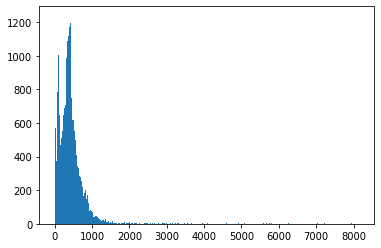

In [78]:
plt.hist([len(i) for i in x], bins=700)
plt.show()

In [79]:
num = np.array([len(i) for i in x])
len(num[num>1000])

1642

In [80]:
maxlen = 1000
x = pad_sequences(x, maxlen=maxlen)

In [81]:
len(x[0])

1000

In [83]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [85]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, dim))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix



In [86]:
embedding_vectors = get_weight_matrix(w2v)

In [87]:
embedding_vectors.shape

(375374, 100)

In [89]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=dim, weights= [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         37537400  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 37,654,777
Trainable params: 117,377
Non-trainable params: 37,537,400
_________________________________________________________________


## Training and Testing Model

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [92]:
model.fit(x_train,y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 125s 160ms/step - loss: 0.1740 - acc: 0.9359 - val_loss: 0.0837 - val_acc: 0.9712
Epoch 2/6
737/737 [==============================] - 117s 159ms/step - loss: 0.0532 - acc: 0.9821 - val_loss: 0.0332 - val_acc: 0.9876
Epoch 3/6
737/737 [==============================] - 117s 159ms/step - loss: 0.0312 - acc: 0.9902 - val_loss: 0.0314 - val_acc: 0.9911
Epoch 4/6
737/737 [==============================] - 118s 160ms/step - loss: 0.0186 - acc: 0.9941 - val_loss: 0.0203 - val_acc: 0.9943
Epoch 5/6
737/737 [==============================] - 118s 160ms/step - loss: 0.0178 - acc: 0.9941 - val_loss: 0.0190 - val_acc: 0.9946
Epoch 6/6
737/737 [==============================] - 118s 160ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0147 - val_acc: 0.9956


In [93]:
y_pred = (model.predict(x_test)>=0.5).astype(int)

In [94]:
accuracy_score(y_test,y_pred)

0.9943875278396437

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5879
           1       0.99      1.00      0.99      5346

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Testing Random Input

Let us try with simple text like 

1. "Trump invites marine who pulled over"
2. "ShellHacks is largest Hackathon"

Now let us try to give the detailed shellHacks data 

3. For several months, Upsilon Pi Epsilon (UPE), the largest student organization for technology at Florida International University (FIU), has been thoroughly preparing for ShellHacks 2021. ShellHacks is recognized as Florida’s largest hackathon, which is evident in how last year’s event gathered impressive numbers with about 1,300 online hackers and over 200 project submissions!

Considering the ongoing COVID-19 pandemic, the organization’s main priority is the safety of all in attendance. Thus, the organization’s fifth ShellHacks will be hosted on September 24th to 26th as an online event. This decision to go fully virtual helps ensure that every participant will still be able to enjoy the full hackathon experience and receive maximum interaction in the safety of their home; despite the virtual environment, UPE aims to host various activities and provide full support to all attending hackers!

In [146]:
input = ['Trump invites marine who pulled over','ShellHacks is largest hackathon']
input = tokenizer.texts_to_sequences(input)
input = pad_sequences(input, maxlen=maxlen)
model.predict(input)

array([[0.5148853],
       [0.2632754]], dtype=float32)

In [147]:
input = ["For several months, Upsilon Pi Epsilon (UPE), the largest student organization for technology at Florida International University (FIU), has been thoroughly preparing for ShellHacks 2021. ShellHacks is recognized as Florida’s largest hackathon, which is evident in how last year’s event gathered impressive numbers with about 1,300 online hackers and over 200 project submissions! Considering the ongoing COVID-19 pandemic, the organization’s main priority is the safety of all in attendance. Thus, the organization’s fifth ShellHacks will be hosted on September 24th to 26th as an online event. This decision to go fully virtual helps ensure that every participant will still be able to enjoy the full hackathon experience and receive maximum interaction in the safety of their home; despite the virtual environment, UPE aims to host various activities and provide full support to all attending hackers!"]
input = tokenizer.texts_to_sequences(input)
input = pad_sequences(input, maxlen=maxlen)
model.predict(input)

array([[0.95427066]], dtype=float32)

In [145]:
input =["India recorded less than 30,000 fresh COVID-19 cases after 132 days while its active caseload fell below 4,00,000 after 124 days on Tuesday, according to Union health ministry data. India recorded 29,689 new coronavirus infections that pushed its tally of COVID-19 cases to 3,14,40,951 while the death toll climbed to 4,21,382 with 415 daily fatalities,"]
input = tokenizer.texts_to_sequences(input)
input = pad_sequences(input, maxlen=maxlen)
model.predict(input)

array([[0.94120044]], dtype=float32)

# Conclusion
**We can see that from the above testing we got 95% accurate information for the genuine information**

**30% for vague information or misinformation**